# 데이터마이닝 9팀 - 당뇨합병증

In [1]:
# 기본적인 라이브러리 Import
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 데이터 전처리

In [2]:
# 사용할 데이터인 건강검진정보데이터와 혈압혈당데이터를 불러왔습니다.
df1 = pd.read_csv("건강검진정보데이터.CSV", encoding='euc-kr')
df2 = pd.read_csv("혈압혈당데이터.csv", encoding='euc-kr')

In [3]:
df1 = df1.sample(frac=1, random_state=0)
df1 = df1.drop_duplicates()
# 건강검진정보데이터의 중복되는 값은 모두 제거하였습니다.
df1 = df1[:100000]
# 데이터의 양이 너무 많으므로 100000개까지만 가져왔습니다.
df1

,SEX,SBP,DBP,BMI,AGE,HEIGHT,WEIGHT,WAIST,FBS,CHOLESTEROL,TRIGLYCERIDE,HDL,LDL,r-GTP
348994,2,80,60,21,11,160,55,74,87,196,67,63,119,22.0
147494,2,140,86,25,13,155,60,85,101,211,146,53,129,23.0
22043,2,120,80,28,15,140,55,83,120,214,83,95,102,42.0
213517,2,98,62,18,9,165,50,60,77,249,37,129,112,19.0
278901,2,131,89,24,9,165,65,78,110,231,102,52,158,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302019,2,121,80,21,11,160,55,72,98,275,141,69,177,49.0
11740,2,123,71,20,12,165,55,70,100,193,145,62,102,42.0
43318,2,145,79,25,16,155,60,91,101,205,93,45,141,70.0
57264,1,178,110,27,13,160,70,88,86,260,79,78,166,24.0


In [4]:
df2 = df2.sample(frac=1, random_state=0)
df2 = df2.drop_duplicates()
# 혈압혈당데이터의 중복되는 값 제거하였습니다.
df2 = df2[:100000]
# 데이터의 양이 너무 많으므로 100000개까지만 가져왔습니다.
df2

,SEX,SBP,DBP,BMI,AGE,FBS,DIS
157105,1,115,73,27,9,82,4
374554,1,127,79,28,18,106,2
688694,2,110,82,24,12,88,4
265381,1,132,85,28,13,135,4
955415,2,120,80,27,25,87,2
...,...,...,...,...,...,...,...
15184,1,119,58,21,2,224,4
13141,1,119,64,19,2,84,4
549326,2,99,53,17,3,90,4
779435,2,120,73,23,16,96,4


In [5]:
from functools import reduce

df_list = [df1, df2]

new_df_list = []
for i in range(len(df_list)):
    part_df = df_list[i].copy()
    part_df.drop_duplicates(subset=['SEX','SBP','DBP', 'BMI', 'FBS'], inplace=True)
    new_df_list.append(part_df.copy())
master_df = reduce(lambda x,y : pd.merge(x,y, on=['SEX','SBP','DBP', 'BMI', 'FBS']), new_df_list)

# df1에 df2를 ['SEX','SBP','DBP', 'BMI', 'FBS'] 기준으로 합칠 때 중복되지 않게 구성 후 master_df 생성하였습니다.

In [6]:
merged_df = master_df[~master_df['DIS'].isin([1, 2])] # 사용하지 않을 DIS 1, 2는 제거하였습니다.
merged_df["DIS"] = merged_df["DIS"].replace({3: 1, 4: 0}) # 제거 후 3, 4의 값을 1, 0 으로 변경하였습니다.
merged_df['SEX'] = merged_df['SEX'].replace({2:0}) #남자:1 / 여자: 0로 변경하였습니다.
merged_df

/var/folders/zr/wdzxgyp52f3f6b59fdwkckrh0000gn/T/ipykernel_60441/2415478690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["DIS"] = merged_df["DIS"].replace({3: 1, 4: 0}) # 제거 후 3, 4의 값을 1, 0 으로 변경하였습니다.
/var/folders/zr/wdzxgyp52f3f6b59fdwkckrh0000gn/T/ipykernel_60441/2415478690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['SEX'] = merged_df['SEX'].replace({2:0}) #남자:1 / 여자: 0로 변경하였습니다.


,SEX,SBP,DBP,BMI,AGE_x,HEIGHT,WEIGHT,WAIST,FBS,CHOLESTEROL,TRIGLYCERIDE,HDL,LDL,r-GTP,AGE_y,DIS
0,0,110,80,20,9,160,50,68,94,275,112,47,205,14.0,8,0
1,0,110,60,18,13,150,40,67,92,185,99,47,118,57.0,4,0
2,1,130,80,22,13,170,65,88,90,140,79,45,79,41.0,16,0
4,0,130,76,25,11,155,60,78,91,120,132,64,29,29.0,17,0
5,1,139,89,27,13,160,70,92,97,242,224,38,159,15.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10141,1,130,80,23,10,175,70,80,108,226,179,43,147,12.0,15,1
10142,0,124,76,19,10,145,40,68,93,188,75,72,101,17.0,23,0
10145,0,102,68,20,11,150,45,77,98,193,134,62,104,13.0,16,0
10146,1,130,80,25,12,160,65,85,82,269,291,50,160,18.0,1,0


#### merged_df 로 전처리와 함께 df1, df2 를 합쳤습니다.

# 사용한 모델들
### 당뇨합병증 진단여부를 분류하는 문제이므로 분류에 적합한 기법들을 활용하였습니다.

# DecisionTree

In [7]:
features = merged_df[['SEX','SBP','DBP','BMI','HEIGHT','WEIGHT','WAIST','CHOLESTEROL','TRIGLYCERIDE','HDL','LDL', 'FBS', 'r-GTP']]
target = merged_df['DIS']
# 독립 변수 13개, 종속변수 1개 (당뇨합병증 진단 여부)로 구성하였습니다.

X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# 데이터를 StandardScaler 이용하여 스케일링 진행하였습니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 10, random_state=0)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=0)

### feature_importance

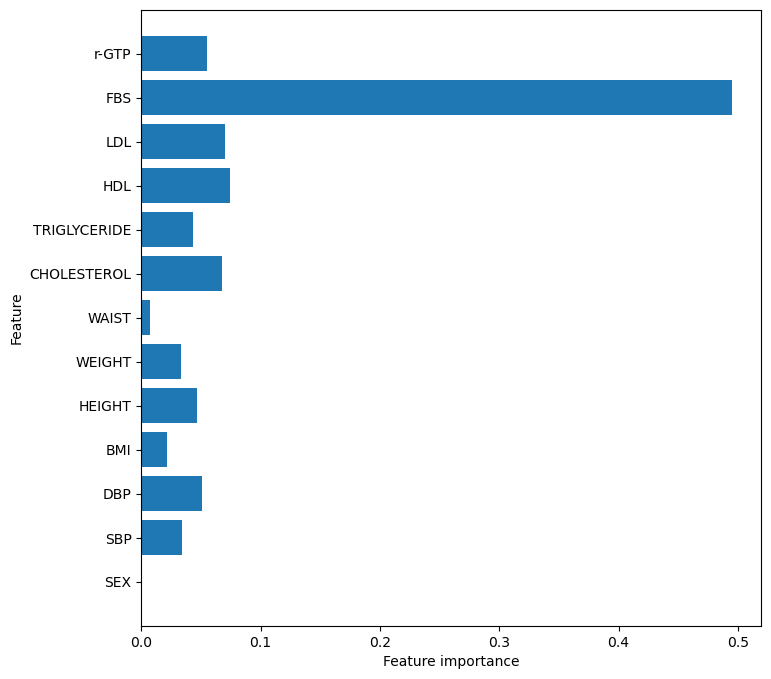

In [8]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = len(X_train.columns)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(8,8))
plot_feature_importances(clf)

### Feature importances 확인 결과 FBS가 압도적으로 높게 나왔으므로 FBS 변수를 포함하고 분석하는 것은 무의미하다고 판단되어 FBS를 빼고 모델링을 다시 해보았습니다.

In [9]:
# 사용할 데이터인 건강검진정보데이터와 혈압혈당데이터를 불러왔습니다.
df1 = pd.read_csv("건강검진정보데이터.CSV", encoding='euc-kr')
df2 = pd.read_csv("혈압혈당데이터.csv", encoding='euc-kr')

In [10]:
df1 = df1.sample(frac=1, random_state=0)
df1 = df1.drop_duplicates()
# 건강검진정보데이터의 중복되는 값은 모두 제거하였습니다.
df1 = df1[:100000]
# 데이터의 양이 너무 많으므로 100000개까지만 가져왔습니다.
df1 = df1.drop('FBS', axis=1)
# FBS(공복혈당)의 importance가 매우 압도적으로 나와 제외하고 dataframe형성하였습니다.
df1

,SEX,SBP,DBP,BMI,AGE,HEIGHT,WEIGHT,WAIST,CHOLESTEROL,TRIGLYCERIDE,HDL,LDL,r-GTP
348994,2,80,60,21,11,160,55,74,196,67,63,119,22.0
147494,2,140,86,25,13,155,60,85,211,146,53,129,23.0
22043,2,120,80,28,15,140,55,83,214,83,95,102,42.0
213517,2,98,62,18,9,165,50,60,249,37,129,112,19.0
278901,2,131,89,24,9,165,65,78,231,102,52,158,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302019,2,121,80,21,11,160,55,72,275,141,69,177,49.0
11740,2,123,71,20,12,165,55,70,193,145,62,102,42.0
43318,2,145,79,25,16,155,60,91,205,93,45,141,70.0
57264,1,178,110,27,13,160,70,88,260,79,78,166,24.0


In [11]:
df2 = df2.sample(frac=1, random_state=0)
df2 = df2.drop_duplicates()
# 혈압혈당데이터의 중복되는 값 제거하였습니다.
df2 = df2[:100000]
# 데이터의 양이 너무 많으므로 100000개까지만 가져왔습니다.
df2 = df2.drop('FBS', axis=1)
# FBS(공복혈당)의 importance가 매우 압도적으로 나와 제외하고 dataframe형성하였습니다.
df2

,SEX,SBP,DBP,BMI,AGE,DIS
157105,1,115,73,27,9,4
374554,1,127,79,28,18,2
688694,2,110,82,24,12,4
265381,1,132,85,28,13,4
955415,2,120,80,27,25,2
...,...,...,...,...,...,...
15184,1,119,58,21,2,4
13141,1,119,64,19,2,4
549326,2,99,53,17,3,4
779435,2,120,73,23,16,4


In [12]:
from functools import reduce

df_list = [df1, df2]

new_df_list = []
for i in range(len(df_list)):
    part_df = df_list[i].copy()
    part_df.drop_duplicates(subset=['SEX','SBP','DBP', 'BMI', 'AGE'], inplace=True)
    new_df_list.append(part_df.copy())
master_df = reduce(lambda x,y : pd.merge(x,y, on=['SEX','SBP','DBP', 'BMI', 'AGE']), new_df_list)

# df1에 df2를 ['SEX','SBP','DBP', 'BMI', 'AGE'] 기준으로 합칠 때 중복되지 않게 구성 후 master_df 생성하였습니다.

In [13]:
master_df

,SEX,SBP,DBP,BMI,AGE,HEIGHT,WEIGHT,WAIST,CHOLESTEROL,TRIGLYCERIDE,HDL,LDL,r-GTP,DIS
0,2,120,80,28,15,140,55,83,214,83,95,102,42.0,4
1,2,98,62,18,9,165,50,60,249,37,129,112,19.0,4
2,2,110,80,20,9,160,50,68,275,112,47,205,14.0,4
3,2,112,61,23,12,160,60,82,226,110,60,144,20.0,3
4,1,130,80,22,13,170,65,88,140,79,45,79,41.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,2,112,68,24,12,145,50,73,226,116,66,136,46.0,4
9975,1,116,70,24,11,175,75,88,288,218,58,186,80.0,4
9976,1,113,61,24,11,165,65,81,204,85,63,145,28.0,4
9977,2,119,75,21,12,155,50,70,198,88,47,133,34.0,4


In [14]:
merged_df = master_df[~master_df['DIS'].isin([1, 2])] # 사용하지 않을 DIS 1, 2는 제거하였습니다.
merged_df["DIS"] = merged_df["DIS"].replace({3: 1, 4: 0}) # 제거 후 3, 4의 값을 1, 0 으로 변경하였습니다.
merged_df['SEX'] = merged_df['SEX'].replace({2:0}) #남자:1 / 여자: 0로 변경하였습니다.
merged_df

/var/folders/zr/wdzxgyp52f3f6b59fdwkckrh0000gn/T/ipykernel_60441/2415478690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["DIS"] = merged_df["DIS"].replace({3: 1, 4: 0}) # 제거 후 3, 4의 값을 1, 0 으로 변경하였습니다.
/var/folders/zr/wdzxgyp52f3f6b59fdwkckrh0000gn/T/ipykernel_60441/2415478690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['SEX'] = merged_df['SEX'].replace({2:0}) #남자:1 / 여자: 0로 변경하였습니다.


,SEX,SBP,DBP,BMI,AGE,HEIGHT,WEIGHT,WAIST,CHOLESTEROL,TRIGLYCERIDE,HDL,LDL,r-GTP,DIS
0,0,120,80,28,15,140,55,83,214,83,95,102,42.0,0
1,0,98,62,18,9,165,50,60,249,37,129,112,19.0,0
2,0,110,80,20,9,160,50,68,275,112,47,205,14.0,0
3,0,112,61,23,12,160,60,82,226,110,60,144,20.0,1
4,1,130,80,22,13,170,65,88,140,79,45,79,41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,0,112,68,24,12,145,50,73,226,116,66,136,46.0,0
9975,1,116,70,24,11,175,75,88,288,218,58,186,80.0,0
9976,1,113,61,24,11,165,65,81,204,85,63,145,28.0,0
9977,0,119,75,21,12,155,50,70,198,88,47,133,34.0,0


In [15]:
features = merged_df[['SEX','SBP','DBP','BMI', 'AGE','HEIGHT','WEIGHT','WAIST','CHOLESTEROL','TRIGLYCERIDE','HDL','LDL']]
target = merged_df['DIS']
# 독립 변수 12개, 종속변수 1개 (당뇨합병증 진단 여부)로 구성하였습니다.

X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# 데이터를 StandardScaler 이용하여 스케일링 진행하였습니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 10, random_state=0)
clf.fit(X_train_scaled, y_train)
y_train_hat = clf.predict(X_train_scaled)
y_val_hat = clf.predict(X_val_scaled)
y_test_hat = clf.predict(X_test_scaled)

### feature_importance

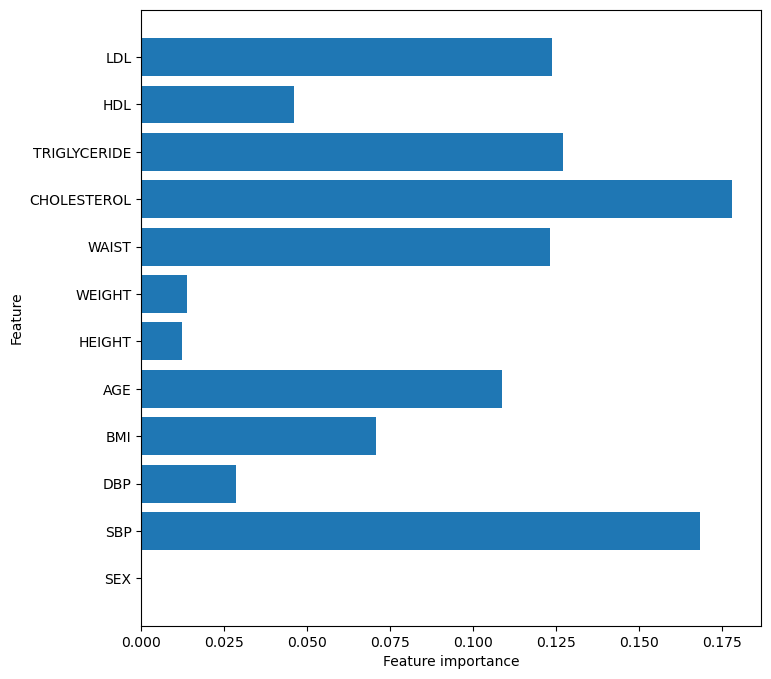

In [16]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = len(X_train.columns)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(8,8))
plot_feature_importances(clf)

### DecisionTree에서는 Feature_importance를 통해 FBS (공복혈당)의 영향력이 너무 쎈 것을 확인 후 변수로 제외하는 용도로 사용하였습니다.

# LogisticRegression
### FBS를 제외하고 분류에 적합한 기법인 로지스틱회귀분석을 선정하였습니다.

In [17]:
# DIS의 0, 1 분포를 확인하였습니다.
value_counts = merged_df['DIS'].value_counts()
print(value_counts)

0    8430
1     354
Name: DIS, dtype: int64


In [18]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /Users/yeahongsu/opt/anaconda3/lib/python3.9/site-packages (0.10.1)
You should consider upgrading via the '/Users/yeahongsu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### DIS 0, 1의 비율이 맞지않아 가중치를 부여 하지않는 경우와 부여하는 경우로 나누어서 분석을 진행하였습니다.

## 가중치 부여 하지 않은 경우

In [19]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = merged_df[['SEX', 'SBP', 'DBP', 'BMI', 'AGE', 'HEIGHT', 'WEIGHT', 'WAIST', 'CHOLESTEROL', 'TRIGLYCERIDE', 'HDL', 'LDL']]
y = merged_df['DIS']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

/Users/yeahongsu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
accuracy

0.9596994535519126

#### 가중치 부여 안 했을 때는 DIS 개수차이가 너무 커서 accuracy가 극단적이게 높게 나왔습니다.

## 변수들의 분포 확인

/var/folders/zr/wdzxgyp52f3f6b59fdwkckrh0000gn/T/ipykernel_60441/3351244842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['DIS_PRED'] = y_pred


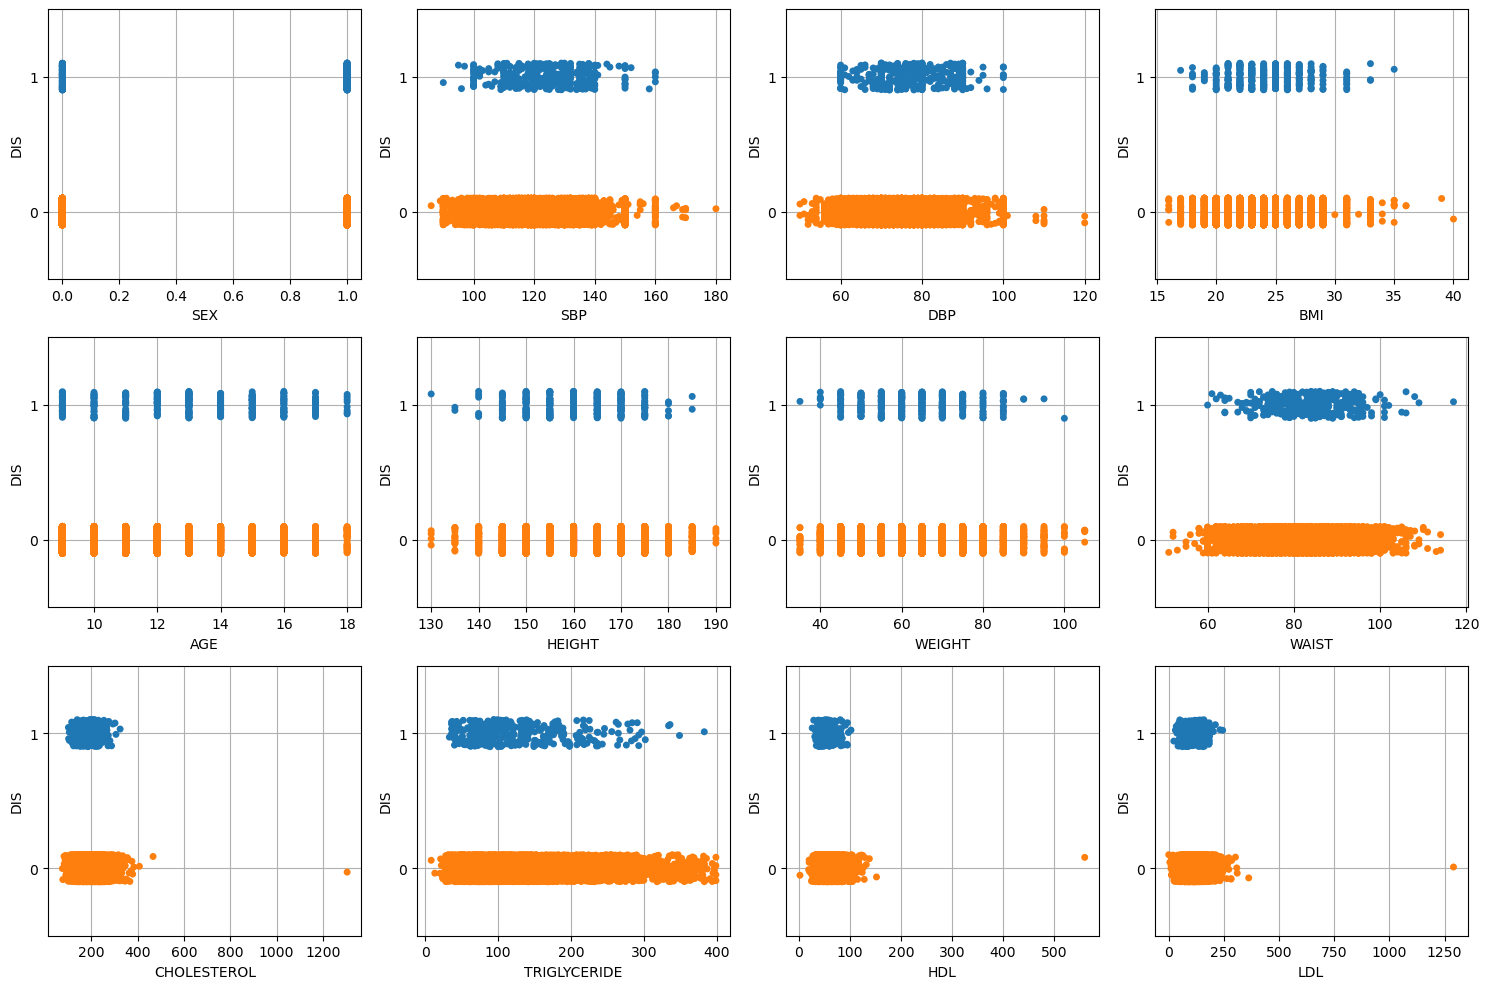

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 학습된 모델로 예측 수행
y_pred = model.predict(X)

# 예측 결과를 데이터프레임에 추가
merged_df['DIS_PRED'] = y_pred

# 변수들에 대한 그래프 생성
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.ravel()

for i, var in enumerate(['SEX', 'SBP', 'DBP', 'BMI', 'AGE', 'HEIGHT', 'WEIGHT', 'WAIST', 'CHOLESTEROL', 'TRIGLYCERIDE', 'HDL', 'LDL']):
    sns.stripplot(x=var, y="DIS", data=merged_df,
                  jitter=True, orient='h', order=[1, 0], ax=axs[i])
    axs[i].grid(True)

plt.tight_layout()
plt.show()


#### 0의 데이터가 압도적으로 많아서 정확한 해석을 하기 어려운 것을 시각화를 통해 알아보았습니다.

## 가중치 부여 전 Logit Regression Results값

In [22]:
import statsmodels.api as sm

model_med = sm.Logit.from_formula('DIS~SEX+SBP+DBP+BMI+AGE+HEIGHT+WEIGHT+WAIST+CHOLESTEROL+TRIGLYCERIDE+HDL+LDL', data=merged_df)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.160493
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    DIS   No. Observations:                 8784
Model:                          Logit   Df Residuals:                     8771
Method:                           MLE   Df Model:                           12
Date:                Sat, 20 May 2023   Pseudo R-squ.:                 0.04977
Time:                        17:53:53   Log-Likelihood:                -1409.8
converged:                       True   LL-Null:                       -1483.6
Covariance Type:            nonrobust   LLR p-value:                 1.685e-25
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.5236      6.389     -2.900      0.004     -31.045      -6.002
SEX              0.3270

## p-value값이 0.05보다 낮은 변수들이 적고 정확한 해석이 어려워 가중치를 부여해본 결과를 보기로 결정하였습니다.

## 가중치 부여한 경우

### hyperparameter 설정

In [23]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression


X = merged_df[['SEX', 'SBP', 'DBP', 'BMI', 'AGE', 'HEIGHT', 'WEIGHT', 'WAIST', 'CHOLESTEROL', 'TRIGLYCERIDE', 'HDL', 'LDL']]
y = merged_df['DIS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# RandomUnderSampler를 사용하여 클래스 불균형 조정
rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# 샘플 가중치 다시 계산
weight_0 = 1.0 / (y_train_resampled == 0).sum()
weight_1 = 1.0 / (y_train_resampled == 1).sum()
sample_weights_resampled = pd.Series([weight_1 if i == 1 else weight_0 for i in y_train_resampled])

training_accuracy = []
validation_accuracy = []
test_accuracy = []

C_settings = [0.01, 0.1, 1]
max_iter_settings = [1, 10, 100]

for C in C_settings:
    for max_iter in max_iter_settings:
        model = LogisticRegression(C=C, max_iter=max_iter)
        model.fit(X_train_resampled, y_train_resampled, sample_weight=sample_weights_resampled)

    
        # prediction
        y_train_hat = model.predict(X_train_resampled)
        y_val_hat = model.predict(X_val_scaled)
        y_test_hat = model.predict(X_test_scaled)
    
        # evaluation 
        training_accuracy.append(accuracy_score(y_train_resampled, y_train_hat))
        validation_accuracy.append(accuracy_score(y_val, y_val_hat))
        test_accuracy.append(accuracy_score(y_test, y_test_hat))
        
pd.DataFrame({"C": sorted(C_settings*3), "max_iter": max_iter_settings*3, "training accuracy": training_accuracy, "validation accuracy": validation_accuracy, "test accuracy": test_accuracy})

/Users/yeahongsu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yeahongsu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

,C,max_iter,training accuracy,validation accuracy,test accuracy
0,0.01,1,0.606132,0.505976,0.514513
1,0.01,10,0.608491,0.592487,0.599317
2,0.01,100,0.608491,0.592487,0.599317
3,0.10,1,0.606132,0.505976,0.514513
4,0.10,10,0.606132,0.595333,0.603870
5,0.10,100,0.606132,0.595333,0.603870
6,1.00,1,0.606132,0.505976,0.514513
7,1.00,10,0.622642,0.613546,0.618099
8,1.00,100,0.622642,0.613546,0.618099


### c=1, max_iter=100 이므로 디폴트값으로 진행하였습니다.

In [24]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = merged_df[['SEX', 'SBP', 'DBP', 'BMI', 'AGE', 'HEIGHT', 'WEIGHT', 'WAIST', 'CHOLESTEROL', 'TRIGLYCERIDE', 'HDL', 'LDL']]
y = merged_df['DIS']

weight_0 = 1.0 / (y == 0).sum()
weight_1 = 1.0 / (y == 1).sum()
sample_weights = pd.Series([weight_1 if i == 1 else weight_0 for i in y])

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y, sample_weight=sample_weights)

/Users/yeahongsu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 가중치 부여 후 성능 평가

In [26]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
accuracy

0.6142987249544627

In [27]:
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred)
precision

0.06532951289398281

In [28]:
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred)
recall

0.6440677966101694

In [29]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)
f1

0.11862643080124871

## 변수들의 분포 확인

/var/folders/zr/wdzxgyp52f3f6b59fdwkckrh0000gn/T/ipykernel_60441/3783635137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['DIS_PRED'] = y_pred


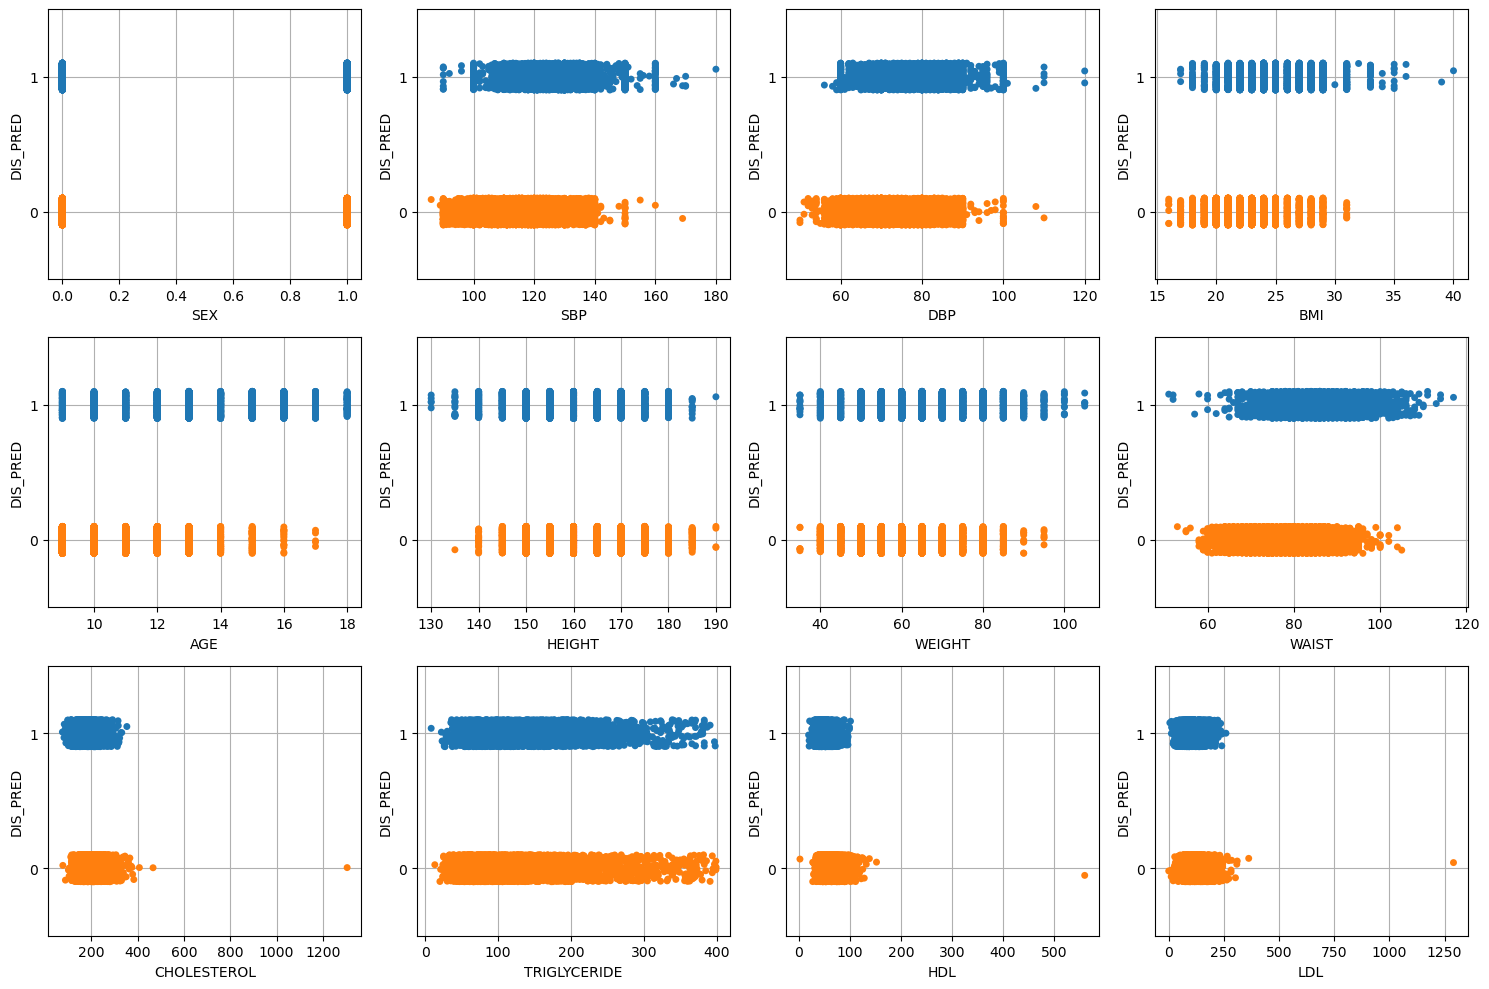

In [30]:
# 학습된 모델로 예측 수행
y_pred = model.predict(X)

# 예측 결과를 데이터프레임에 추가
merged_df['DIS_PRED'] = y_pred

# 변수들에 대한 그래프 생성
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.ravel()

for i, var in enumerate(['SEX', 'SBP', 'DBP', 'BMI', 'AGE', 'HEIGHT', 'WEIGHT', 'WAIST', 'CHOLESTEROL', 'TRIGLYCERIDE', 'HDL', 'LDL']):
    sns.stripplot(x=var, y="DIS_PRED", data=merged_df,
                  jitter=True, orient='h', order=[1, 0], ax=axs[i])
    axs[i].grid(True)

plt.tight_layout()
plt.show()


### 가중치 부여 후 시각화를 하니 0과 1의 분포가 다른 것을 TRIGLYCERIDE를 제외하고 확인 할 수 있었습니다.

In [31]:
value_counts = merged_df['DIS_PRED'].value_counts()
print(value_counts)

0    5294
1    3490
Name: DIS_PRED, dtype: int64


## 가중치 부여 후 Logit Regression Results값

In [32]:
import statsmodels.api as sm

model_med = sm.Logit.from_formula('DIS_PRED~SEX+SBP+DBP+BMI+AGE+HEIGHT+WEIGHT+WAIST+CHOLESTEROL+HDL+LDL', data=merged_df)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.021371
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:               DIS_PRED   No. Observations:                 8784
Model:                          Logit   Df Residuals:                     8772
Method:                           MLE   Df Model:                           11
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.9682
Time:                        17:53:54   Log-Likelihood:                -187.72
converged:                       True   LL-Null:                       -5902.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.2250     17.778      0.575      0.565     -24.620      45.070
SEX             1.9238   

## p-value값이 0.05보다 모두 낮게 나와서 유의미하다고 판단하였지만 모두 0.00이라 다중공선성 문제가 있을 수도 있다고 판단하였습니다.

# 다중공선성 유무

In [33]:
# 상관 행렬 계산
correlation_matrix = merged_df.corr()
print(correlation_matrix)

# 상관 행렬(Correlation Matrix): 독립 변수들 간의 상관 관계를 확인하기 위해 상관 행렬을 생성합니다. 상관 계수가 0.7 이상인 변수들은 다중공선성의 가능성이 있습니다.

                   SEX       SBP       DBP       BMI       AGE    HEIGHT  \
SEX           1.000000  0.253453  0.285743  0.278923 -0.019678  0.701311   
SBP           0.253453  1.000000  0.783578  0.308687  0.153454  0.122083   
DBP           0.285743  0.783578  1.000000  0.288883  0.039121  0.180920   
BMI           0.278923  0.308687  0.288883  1.000000  0.035491  0.147428   
AGE          -0.019678  0.153454  0.039121  0.035491  1.000000 -0.344051   
HEIGHT        0.701311  0.122083  0.180920  0.147428 -0.344051  1.000000   
WEIGHT        0.644085  0.287011  0.310747  0.758450 -0.201588  0.748727   
WAIST         0.501702  0.337953  0.319612  0.740148  0.163818  0.391168   
CHOLESTEROL  -0.070869 -0.003359  0.044537 -0.004222 -0.187215  0.004899   
TRIGLYCERIDE  0.237802  0.197252  0.207992  0.293551 -0.013112  0.154566   
HDL          -0.289241 -0.108484 -0.095498 -0.263421 -0.124404 -0.165426   
LDL          -0.037434 -0.024612  0.018004  0.005249 -0.152851  0.023100   
r-GTP       

In [34]:
# 상관 행렬 계산
correlation_matrix = merged_df.corr()

# -1과 1에 가까운 변수들 출력
threshold = 0.75  # 상관 계수의 절대값이 이 값보다 크면 출력
highly_correlated_vars = []

# 상관 행렬 순회
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) >= threshold:
            variable1 = correlation_matrix.columns[i]
            variable2 = correlation_matrix.columns[j]
            highly_correlated_vars.append((variable1, variable2, corr))

# 결과 출력
for var1, var2, corr in highly_correlated_vars:
    print(f"Variables: {var1}, {var2}")
    print(f"Correlation: {corr}")
    print()


Variables: SBP, DBP
Correlation: 0.783578468474475

Variables: BMI, WEIGHT
Correlation: 0.7584496273534697

Variables: WEIGHT, WAIST
Correlation: 0.7512428606717413

Variables: CHOLESTEROL, LDL
Correlation: 0.9299124848960683



### 상관행렬 0.75보다 높은 값들 중에 CHOLESTEROL, WEIGHT  총 2개의 변수를 제거하였습니다.

In [35]:
import statsmodels.api as sm

model_med = sm.Logit.from_formula('DIS_PRED~SEX+SBP+DBP+BMI+AGE+HEIGHT+WAIST+HDL+LDL', data=merged_df)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.084884
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               DIS_PRED   No. Observations:                 8784
Model:                          Logit   Df Residuals:                     8774
Method:                           MLE   Df Model:                            9
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.8737
Time:                        17:53:54   Log-Likelihood:                -745.63
converged:                       True   LL-Null:                       -5902.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -107.6542      4.527    -23.780      0.000    -116.527     -98.781
SEX            0.3010      0

# 결과

### LogisticRegression을 사용했을 때 약 61% 확률의 예측률을 보여줬습니다.

## 당뇨합병증에 영향을 많이 주는 인자를 coef 값을 활용하여 선정하였습니다.
#### Intercept   -107.6542
#### SEX            0.3010
#### SBP            0.1957
#### DBP            0.2101
#### BMI            1.4397
#### AGE            3.5926
#### HEIGHT        -0.0393
#### WAIST          0.1672
#### HDL           -0.2796
#### LDL           -0.0266

# 당뇨합병증에 걸릴 확률에 대한 회귀식

### 오즈 활용
#### L o g ( p / ( 1 - p ) ) = -107.6542 + 0.3010 (SEX) + 0.1957 (SBP) + 0.2101 (DBP) +1.4397 (BMI) + 3.5926 (AGE) -0.0393 (HEIGHT) + 0.1672 (WAIST) - 0.2796 (HDL) - 0.0266 (LDL) 입니다.

### 이에 따른 결과 회귀식은 차후 당뇨합병증을 예측하는 프로그램 제작에 활용된다면 당뇨합병증 위험도를 자가진단 할 수 있는 서비스를 할 수 있을 것이라고 봅니다.

## 분석 한계점

#### 모형이 설명력이 다소 미흡하여 당뇨합병증이 잘 예측되었다고 볼 수 없었습니다. 1년 단위의 데이터를 분석하였기에 최소 3년이상의 데이터들을 분석하였다면 더욱 예측력이 좋은 모형을 만들 수 있었을 것입니다.